# DataFrames: Read and Write Data
     
Dask Dataframes can read and store data in many of the same formats as Pandas dataframes.  In this example we read and write data with the popular CSV and Parquet formats, and discuss best practices when using these formats.

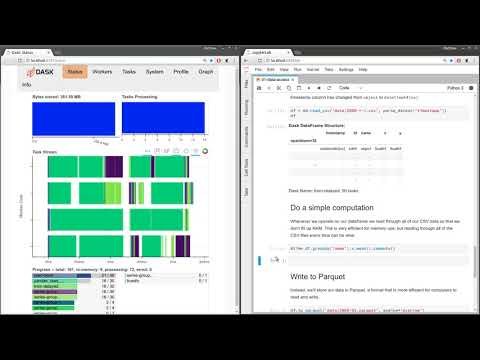

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("0eEsIA0O1iE")

## Start Dask Client for Dashboard

Starting the Dask Client is optional.  It will provide a dashboard which 
is useful to gain insight on the computation.  

The link to the dashboard will become visible when you create the client below.  We recommend having it open on one side of your screen while using your notebook on the other side.  This can take some effort to arrange your windows, but seeing them both at the same is very useful when learning.

In [2]:
from dask.distributed import Client
client = Client(n_workers=1, threads_per_worker=4, processes=True, memory_limit='2GB')
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 1
Total threads: 4,Total memory: 1.86 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39645,Workers: 1
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 1.86 GiB
Comm: tcp://127.0.0.1:39677,Total threads: 4
Dashboard: http://127.0.0.1:45469/status,Memory: 1.86 GiB
Nanny: tcp://127.0.0.1:42877,


## Create artificial dataset

First we create an artificial dataset and write it to many CSV files.

You don't need to understand this section, we're just creating a dataset for the rest of the notebook.

In [3]:
import dask
df = dask.datasets.timeseries()
df

,id,name,x,y
npartitions=30,,,,
2000-01-01,int64,object,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [4]:
import os
import datetime

if not os.path.exists('data'):
    os.mkdir('data')

def name(i):
    """ Provide date for filename given index
    
    Examples
    --------
    >>> name(0)
    '2000-01-01'
    >>> name(10)
    '2000-01-11'
    """
    return str(datetime.date(2000, 1, 1) + i * datetime.timedelta(days=1))

df.to_csv('data/*.csv', name_function=name);

## Read CSV files

We now have many CSV files in our data directory, one for each day in the month of January 2000.  Each CSV file holds timeseries data for that day.  We can read all of them as one logical dataframe using the `dd.read_csv` function with a glob string.

In [5]:
!ls data/*.csv | head

data/2000-01-01.csv
data/2000-01-02.csv
data/2000-01-03.csv
data/2000-01-04.csv
data/2000-01-05.csv
data/2000-01-06.csv
data/2000-01-07.csv
data/2000-01-08.csv
data/2000-01-09.csv
data/2000-01-10.csv


In [6]:
!head data/2000-01-01.csv

timestamp,id,name,x,y
2000-01-01 00:00:00,942,Laura,-0.6992844254899655,-0.8512182186637509
2000-01-01 00:00:01,1001,Ingrid,-0.35655218506890174,-0.1333675368289131
2000-01-01 00:00:02,1045,Ray,0.9308817992978557,-0.7657382399219965
2000-01-01 00:00:03,1096,Ursula,-0.07169651020447487,0.7329341299806349
2000-01-01 00:00:04,1028,Frank,0.4840809936405117,-0.7532100990533956
2000-01-01 00:00:05,1002,Kevin,-0.5099252836176822,0.2589870469872313
2000-01-01 00:00:06,986,Oliver,0.2819161947932025,0.8777597107462218
2000-01-01 00:00:07,984,Zelda,-0.8488793864869324,-0.6648445820462445
2000-01-01 00:00:08,984,Alice,-0.40397772883173877,0.3787940602707516


In [7]:
!head data/2000-01-30.csv

timestamp,id,name,x,y
2000-01-30 00:00:00,1075,Yvonne,0.9804821992755703,0.9342660180942868
2000-01-30 00:00:01,978,Sarah,-0.5156484553203295,0.7666590078530018
2000-01-30 00:00:02,1015,Yvonne,0.31271886602653454,0.5556139994936489
2000-01-30 00:00:03,950,Tim,-0.9611774587405728,0.6518684763812226
2000-01-30 00:00:04,1009,Laura,0.3864817882955096,-0.40518939940779086
2000-01-30 00:00:05,1043,Zelda,0.8163604396499844,0.1654981534399429
2000-01-30 00:00:06,1010,Ray,0.2292042174888287,0.22972217434866016
2000-01-30 00:00:07,980,Patricia,0.7755825145264919,-0.20503360813537785
2000-01-30 00:00:08,1000,Jerry,-0.5041018854329813,-0.3678526026563367


We can read one file with `pandas.read_csv` or many files with `dask.dataframe.read_csv`

In [8]:
import pandas as pd

df = pd.read_csv('data/2000-01-01.csv')
df.head()

,timestamp,id,name,x,y
0,2000-01-01 00:00:00,942,Laura,-0.699284,-0.851218
1,2000-01-01 00:00:01,1001,Ingrid,-0.356552,-0.133368
2,2000-01-01 00:00:02,1045,Ray,0.930882,-0.765738
3,2000-01-01 00:00:03,1096,Ursula,-0.071697,0.732934
4,2000-01-01 00:00:04,1028,Frank,0.484081,-0.753210


In [9]:
import dask.dataframe as dd

df = dd.read_csv('data/2000-*-*.csv')
df

,timestamp,id,name,x,y
npartitions=30,,,,,
,object,int64,object,float64,float64
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [10]:
df.head()

,timestamp,id,name,x,y
0,2000-01-01 00:00:00,942,Laura,-0.699284,-0.851218
1,2000-01-01 00:00:01,1001,Ingrid,-0.356552,-0.133368
2,2000-01-01 00:00:02,1045,Ray,0.930882,-0.765738
3,2000-01-01 00:00:03,1096,Ursula,-0.071697,0.732934
4,2000-01-01 00:00:04,1028,Frank,0.484081,-0.753210


## Tuning read_csv

The Pandas `read_csv` function has *many* options to help you parse files.  The Dask version uses the Pandas function internally, and so supports many of the same options.  You can use the `?` operator to see the full documentation string.

In [11]:
pd.read_csv?

In [12]:
dd.read_csv?

In this case we use the `parse_dates` keyword to parse the timestamp column to be a datetime.  This will make things more efficient in the future.  Notice that the dtype of the timestamp column has changed from `object` to `datetime64[ns]`.

In [13]:
df = dd.read_csv('data/2000-*-*.csv', parse_dates=['timestamp'])
df

,timestamp,id,name,x,y
npartitions=30,,,,,
,datetime64[ns],int64,object,float64,float64
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


## Do a simple computation

Whenever we operate on our dataframe we read through all of our CSV data so that we don't fill up RAM.  This is very efficient for memory use, but reading through all of the CSV files every time can be slow.

In [14]:
%time df.groupby('name').x.mean().compute()

CPU times: user 192 ms, sys: 26.5 ms, total: 218 ms
Wall time: 3.08 s


name
Alice       0.002023
Bob        -0.003863
Charlie     0.000606
Dan         0.000150
Edith      -0.000282
Frank       0.001423
George      0.002315
Hannah      0.000852
Ingrid     -0.000094
Jerry       0.000310
Kevin       0.001148
Laura      -0.000501
Michael    -0.001015
Norbert     0.002500
Oliver      0.001086
Patricia    0.001096
Quinn      -0.001556
Ray        -0.003189
Sarah      -0.001080
Tim        -0.002812
Ursula     -0.001879
Victor     -0.002964
Wendy       0.003376
Xavier      0.000454
Yvonne     -0.000145
Zelda      -0.000064
Name: x, dtype: float64

## Write to Parquet

Instead, we'll store our data in Parquet, a format that is more efficient for computers to read and write.

In [15]:
df.to_parquet('data/2000-01.parquet', engine='pyarrow')

[None]

In [16]:
!ls data/2000-01.parquet/

_common_metadata  part.14.parquet  part.21.parquet  part.29.parquet
_metadata	  part.15.parquet  part.22.parquet  part.3.parquet
part.0.parquet	  part.16.parquet  part.23.parquet  part.4.parquet
part.1.parquet	  part.17.parquet  part.24.parquet  part.5.parquet
part.10.parquet   part.18.parquet  part.25.parquet  part.6.parquet
part.11.parquet   part.19.parquet  part.26.parquet  part.7.parquet
part.12.parquet   part.2.parquet   part.27.parquet  part.8.parquet
part.13.parquet   part.20.parquet  part.28.parquet  part.9.parquet


## Read from Parquet

In [17]:
df = dd.read_parquet('data/2000-01.parquet', engine='pyarrow')
df

,timestamp,id,name,x,y
npartitions=30,,,,,
,datetime64[ns],int64,object,float64,float64
,...,...,...,...,...
...,...,...,...,...,...
,...,...,...,...,...
,...,...,...,...,...


In [18]:
%time df.groupby('name').x.mean().compute()

CPU times: user 118 ms, sys: 25.6 ms, total: 144 ms
Wall time: 922 ms


name
Alice       0.002023
Bob        -0.003863
Charlie     0.000606
Dan         0.000150
Edith      -0.000282
Frank       0.001423
George      0.002315
Hannah      0.000852
Ingrid     -0.000094
Jerry       0.000310
Kevin       0.001148
Laura      -0.000501
Michael    -0.001015
Norbert     0.002500
Oliver      0.001086
Patricia    0.001096
Quinn      -0.001556
Ray        -0.003189
Sarah      -0.001080
Tim        -0.002812
Ursula     -0.001879
Victor     -0.002964
Wendy       0.003376
Xavier      0.000454
Yvonne     -0.000145
Zelda      -0.000064
Name: x, dtype: float64

## Select only the columns that you plan to use

Parquet is a column-store, which means that it can efficiently pull out only a few columns from your dataset.  This is good because it helps to avoid unnecessary data loading.

In [19]:
%%time
df = dd.read_parquet('data/2000-01.parquet', columns=['name', 'x'], engine='pyarrow')
df.groupby('name').x.mean().compute()

CPU times: user 125 ms, sys: 6.87 ms, total: 132 ms
Wall time: 845 ms


name
Alice       0.002023
Bob        -0.003863
Charlie     0.000606
Dan         0.000150
Edith      -0.000282
Frank       0.001423
George      0.002315
Hannah      0.000852
Ingrid     -0.000094
Jerry       0.000310
Kevin       0.001148
Laura      -0.000501
Michael    -0.001015
Norbert     0.002500
Oliver      0.001086
Patricia    0.001096
Quinn      -0.001556
Ray        -0.003189
Sarah      -0.001080
Tim        -0.002812
Ursula     -0.001879
Victor     -0.002964
Wendy       0.003376
Xavier      0.000454
Yvonne     -0.000145
Zelda      -0.000064
Name: x, dtype: float64

Here the difference is not that large, but with larger datasets this can save a great deal of time.

## Learn more

http://docs.dask.org/en/latest/dataframe-create.html